## Rider Sentiment Analysis


# After webscraping the data, we will perform sentiment analysis on the reviews of the riders.
#### The data is collected from various sources including:
- https://www.reddit.com/r/transit/comments/1bt9yng/the_chicago_l_is_an_american_treasure/
- https://www.reddit.com/r/cta/comments/1dwa1w5/how_bad_is_the_cta_really_compared_to_other_cities/
- https://www.tripadvisor.com/ShowUserReviews-g35805-d549354-r491931481-Chicago_Transit_Authority_CTA-Chicago_Illinois.html
- https://www.yelp.com/biz/chicago-transit-authority-chicago-6
#### Employee reviews from:
https://www.indeed.com/cmp/Chicago-Transit-Authority/reviews




In [57]:
import pandas as pd
import nltk
import re
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import requests

In [58]:

# Webscraping the data from reddit

def get_reddit_comments(url):
    try:
        response = requests.get(url, headers={'User-Agent': 'Chrome/58.0.3029.110'})
        response.raise_for_status()
        data = response.json()
        
        if len(data) < 2 or 'data' not in data[1] or 'children' not in data[1]['data']:
            print(f"Unexpected JSON structure from {url}")
            return []

        comments_body1 = [
            comment['data']['body']
            for comment in data[1]['data']['children']
            if 'body' in comment['data']
        ]
        return comments_body1
    except requests.exceptions.RequestException as e:
        print(f"Request failed: {e} | URL: {url}")
    except ValueError as e:
        print(f"Invalid JSON response from {url}: {e}")
    except KeyError as e:
        print(f"Missing key in JSON from {url}: {e}")
    return []

# Define the URLS
reddit_urls = [
    'https://www.reddit.com/r/AskChicago/comments/1bd1qvv/anxiety_and_public_trans/.json',
    'https://www.reddit.com/r/cta/comments/1fawrep/cta_safety/.json',
    'https://www.reddit.com/r/chicago/comments/1fa12z8/when_does_ctas_contract_with_action_k9_security/.json',
    'https://www.reddit.com/r/cta/comments/1hyip6m/security_guards_at_clark_and_lake/.json',
    'https://www.reddit.com/r/cta/comments/1jyg948/security_on_redline_train_cars/.json',
    'https://www.reddit.com/r/cta/comments/1etdbub/the_cta_has_71_million_to_spend_on_private/.json',
    'https://www.reddit.com/r/chicago/comments/1601ue0/what_is_even_the_point_of_the_cta_security/.json',
    'https://www.reddit.com/r/cta/comments/1ir9sn2/what_happened_to_the_k9_security_folks_on_the/.json',
    'https://www.reddit.com/r/chicago/comments/15ok7w0/any_comments_about_cta_security_guards/.json',
    'https://www.reddit.com/r/cta/comments/1d5sxem/cops_actually_patrolling_cta/.json',
    'https://www.reddit.com/r/chicago/comments/187syls/intercon_cta_blue_line_security/.json',
    'https://www.reddit.com/r/SameGrassButGreener/comments/1dzy7ry/chicago_cta_safety_vs_nyc_train/.json',
    'https://www.reddit.com/r/cta/comments/1hzl3ro/feeling_unsafe_on_blue_line/.json',
    'https://www.reddit.com/r/chicago/comments/1acn0an/how_safe_is_the_cta/.json',    
    'https://www.reddit.com/r/chicago/comments/1dushal/private_security_on_the_cta/.json',
    'https://www.reddit.com/r/cta/comments/1iao3va/yes_we_need_police_on_the_trains_and_i_would/.json',
    'https://www.reddit.com/r/cta/comments/1fc5fhp/safety_petition/.json',
    'https://www.reddit.com/r/cta/comments/1famme7/ctas_high_violent_crime_rate_keeps_away_whats/.json',
    'https://www.reddit.com/r/cta/comments/1jguwbi/clean_up_your_act_cta/.json',
    'https://www.reddit.com/r/chicago/comments/1g2a4vx/at_board_meeting_cta_is_piloting_digital_bus_stop/.json',
    'https://www.reddit.com/r/cta/comments/1adbz9r/policesecurity_at_stations/.json',
    'https://www.reddit.com/r/AskChicago/comments/1f3smyl/cta_stops_safety_question_roosevelt_vs_monroe/.json'
]
# join get_reddit_comments(rdt_url) and get_reddit_comments(rdt_url2)
comments_body = []
for url in reddit_urls:
    comments_body.extend(get_reddit_comments(url))



print(len(comments_body))
# Store the post & comments in a list

# Convert the list to a dataframe
reddit_df = pd.DataFrame(comments_body, columns=['comment'])

# display(reddit_df)

500


In [59]:



# Do some sentiment analysis on the comments with nltk
nltk.download('all')

# Do the same for the other sources
def preprocess_text_light(text):
    # Lowercase and basic cleanup
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # remove URLs
    text = re.sub(r"\n", " ", text)  # remove newlines
    text = re.sub(r"[^a-zA-Z0-9.,!?'\"]+", ' ', text)  # keep punctuation
    return text.strip()

reddit_df['processed_comment'] = reddit_df['comment'].apply(preprocess_text_light)
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    sentiment = 1 if scores['pos'] > 0 else 0
    return sentiment

# data clean up
reddit_df = reddit_df[~reddit_df['comment'].str.lower().isin(['[deleted]', '[removed]'])]
reddit_df = reddit_df[reddit_df['comment'].str.split().str.len() > 2]

reddit_df['sentiment'] = reddit_df['processed_comment'].apply(get_sentiment)
display(reddit_df)



[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\princ\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\princ\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\princ\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\princ\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\princ\AppData\Roaming\nltk_data...
[

,comment,processed_comment,sentiment
0,Just remind yourself that the trains only go i...,just remind yourself that the trains only go i...,0
1,In short a few things:\n\n1) Leave early to al...,in short a few things 1 leave early to allow r...,1
2,Try the transit when you don’t really have any...,try the transit when you don t really have any...,0
3,Google maps. It will tell you what stops to ta...,google maps. it will tell you what stops to ta...,1
4,"Practice makes perfect, you’ll learn your rout...","practice makes perfect, you ll learn your rout...",1
...,...,...,...
493,"Hi, I am a bot. I think you might be asking ab...","hi, i am a bot. i think you might be asking ab...",1
495,Roosevelt is my home station. Right around the...,roosevelt is my home station. right around the...,1
497,Roosevelt feels fine during the weekday and ru...,roosevelt feels fine during the weekday and ru...,1
498,I lived off of the Roosevelt stop for three ye...,i lived off of the roosevelt stop for three ye...,1


In [60]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(reddit_df['sentiment'], reddit_df['sentiment']))
# print(classification_report(reddit_df['sentiment'], reddit_df['sentiment']))

[[139   0]
 [  0 331]]


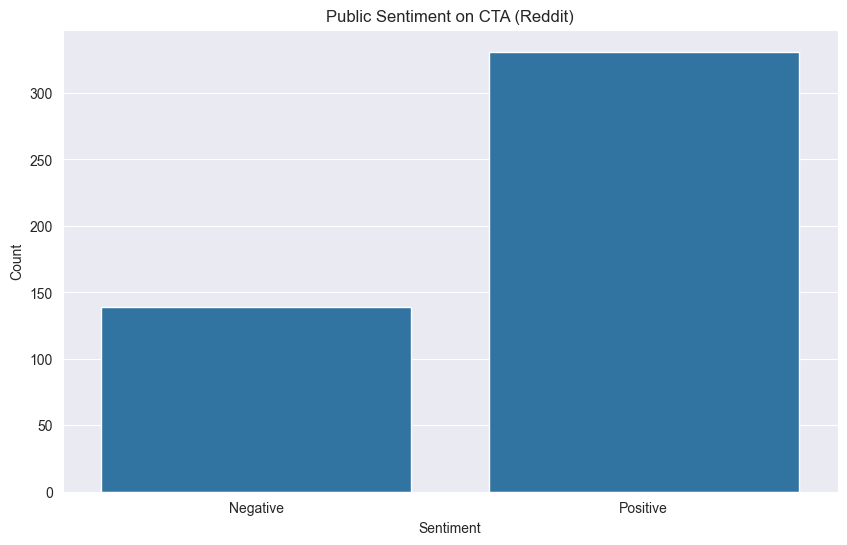

,comment,processed_comment,sentiment
0,Just remind yourself that the trains only go i...,just remind yourself that the trains only go i...,0
1,In short a few things:\n\n1) Leave early to al...,in short a few things 1 leave early to allow r...,1
2,Try the transit when you don’t really have any...,try the transit when you don t really have any...,0
3,Google maps. It will tell you what stops to ta...,google maps. it will tell you what stops to ta...,1
4,"Practice makes perfect, you’ll learn your rout...","practice makes perfect, you ll learn your rout...",1
...,...,...,...
493,"Hi, I am a bot. I think you might be asking ab...","hi, i am a bot. i think you might be asking ab...",1
495,Roosevelt is my home station. Right around the...,roosevelt is my home station. right around the...,1
497,Roosevelt feels fine during the weekday and ru...,roosevelt feels fine during the weekday and ru...,1
498,I lived off of the Roosevelt stop for three ye...,i lived off of the roosevelt stop for three ye...,1


In [61]:

# graph the sentiment
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))

sns.countplot(x='sentiment', data=reddit_df)
plt.title('Public Sentiment on CTA (Reddit)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

# Display full table of sentiment and comments

reddit_df[['comment', 'sentiment']].to_csv('reddit_sentiment.csv', index=False)

reddit_df
